<a href="https://colab.research.google.com/github/DrPaps/DrPaps/blob/main/N_Ways_of_Measuring_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N ways to measure $\pi$

* **Author:**

* **Date:**

* **Time spent on this assignment:**

Remember to execute this cell to load numpy and pylab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
def resetMe(keepList=[]):
    ll=%who_ls
    keepList=keepList+['resetMe','np','plt','math','random']
    for iiii in keepList:
        if iiii in ll:
            ll.remove(iiii)
    for iiii in ll:
        jjjj="^"+iiii+"$"
        %reset_selective -f {jjjj}
    ll=%who_ls
    plt.rcParams.update({"font.size": 14})
    return
import datetime;datetime.datetime.now()
resetMe()

In this project we will consider three different ways of measuring $\pi$.  


<div class="alert alert-info">
Confused about what exactly you need to do?  <br />
    <b>Look for the owl emoji 🦉 for instructions</b> <br />
</div>

## Exercise 1: Series

* **List of collaborators:**

* **References you used in developing your code:**


In this exercise we will compute the value of $\pi$ using a series (a sum of bunch of terms). We will use different series which converge at different rates. 

### a. $\pi$ from $\tan$ 

Recall that we can generally find infinite series representations of transcendental functions like $\sin(x)$. In particlar

$$\tan^{-1}(x) = \sum_{n=0}^\infty \frac{(-1)^n}{2n+1} x^{2n+1} ; -1<x\leq 1$$

Since $\tan^{-1}(1) = \pi/4$, we can write the following (slowly converging) infinite series:

$$\frac{\pi}{4} = \sum_{n=0}^\infty \frac{(-1)^n}{2n+1} = 1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + ...$$

If we group adjacent terms in the series we can rewrite this as 

$$
\begin{align}
\frac{\pi}{4} = \sum_{n=0}^\infty \frac{(-1)^n}{2n+1} &= \left(1-\frac{1}{3}\right) + \left(\frac{1}{5}-\frac{1}{7}\right) + \left(\frac{1}{9}-\frac{1}{11}\right) + ...\\
&=\frac{3-1}{3 \cdot 1} + \frac{7-5}{7 \cdot 5} + \frac{11-9}{11 \cdot 9}+...\\
&=\frac{2}{3}+ \frac{2}{35}+\frac{2}{99} + ...\\
&= \boxed{2 \cdot \sum_{n=0}^\infty \left[ \frac{1}{(4n+3)(4n+1)} \right]}
\end{align}
$$

The value of $\pi$ is $3.14159265358979323846264338327950288419716939937510582...$ though the precision with which your computer can calculate it is probably limited to fewer digits than this.

🦉Please write a Python script that calculates an approximation to $\pi$ using the arctan series **i.e. the boxed formula**, and compare its accuracy after the $n = 10$ term, 100 term, 10,000 term, and 1,000,000 term.

There are two ways to approach this.  One of these is by writing a loop (use a conditional statement to print something after the appropriate terms): 

Start by initializing a few things, then executing a loop that calculates the nth term, with n running from 0 to 999,999, summing the terms as you go.

The other option is to write this in a line or two using list comprehensions. 

Let us start with a loop.

<div class="alert alert-warning">
<b>Do not use the word <code>sum</code> as a variable!</b> <br />Notice how <code>sum</code> is green in a cell - this means it is a special keyword.<br /> 
</div>

*Write your for loop computing the difference from $\pi$ for a given term in the series below*

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>


In [2]:
# ANSWER ME
answer = 0
n = 1000000
for i in range(0,n):
  answer += 1/((4*i + 3)*(4*i + 1))
real_answer = 8 * answer
real_answer
# Pi value returned for 10 terms is 3.091623806667838
# Pi value returned for 100 terms is 3.1365926848388144
# Pi value returned for 10000 terms is 3.1415426535898203
# Pi value returned for 1000000 terms is 3.141592153589902

3.141592153589902

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>


### b. List Comprehensions

We'll now look deeper at the terms in the series above, in order to practice plotting and analyzing data.

Recall that we can store items into a list. A very useful feature about a list is that it can be variable length!
To initialize a new list we use `[]`, and can add to it by using the `append()` function

In [3]:
myList = []
myList.append(10)
print(myList)
print("myList is length",len(myList))

[10]
myList is length 1


This is obviously most useful in a `for` loop, where we can append numbers to the list.

In [4]:
myList = [] #don't forget to reset it!
for i in range(0,5):
    myList.append(i+5)
print(myList)
print("myList is length",len(myList))

[5, 6, 7, 8, 9]
myList is length 5


We'll want to plot some lists in a moment. Plotting things in python uses the matplotlib package, imported as `plt`. There are two basic steps for plotting:
* `plt.plot(x,y)`
    * This tells matplotlib to plot the lists or arrays `x` and `y`. You can also add instructions on how it should look after x,y. If we wanted a dashed line we can use `plt.plot(x,y,'--')` or if we want square points we can use `plt.plot(x,y,'s')`
* `plt.show()` 
    * This tells matplotlib you're done drawing/adding data and to render the image

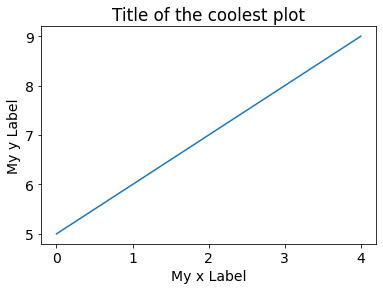

In [5]:
#if we add '--' it will be dashed, and if we add 's' there will be squares. What if we do both?
plt.plot(range(0,5),myList)
plt.xlabel("My x Label")
plt.ylabel("My y Label")
plt.title("Title of the coolest plot")
plt.show()

🦉Now write code to make two lists, one of each term
$$
\frac{1}{(4n+3)(4n+1)}
$$
in the $tan^{-1}$ series above (you can include the factor of 8 if you like), and another indexing which term it is (you may start numbering at 0 to make it easy). Do this for 100,000 terms.   
You'll probably find that the terms in the series look pretty boring. That's because they get small really fast! To see them a little better we can adjust the y-axis to be scalled *logrithmically* rather than *linearly*, by calling `plt.yscale('log')`. (This will be explored later in the course!)

*Write your code (and generate your plot) below.*

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>



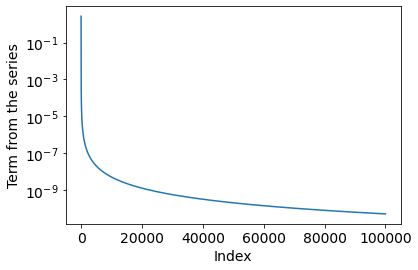

In [6]:
#ANSWER ME
listTerm = []
listIndex = []
n = 100000
for i in range(0,n):
  listIndex.append(i)
  listTerm.append(8/((4*i + 3)*(4*i + 1)))
plt.plot(listIndex,listTerm)
plt.xlabel("Index")
plt.ylabel("Term from the series")
plt.yscale('log')
plt.show()

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

### c. $\pi$ from Ramanujan

A much more rapidly converging series was discovered by the brilliant Indian mathematician Srinivasa Ramanujan.  It is

$$\frac{1}{\pi} = \frac{2\sqrt{2}}{9801} \sum_{k=0}^\infty \frac{(4k)!(1103+26390k)}{(k!)^4396^{4k}}$$

where $k!$ ("k factorial") is $1\times 2\times 3\times ... \times k$ and $(4k)!$ is $1\times2\times3\times ... \times 4k$

🦉Write a Python script that calculates an approximation to $\pi$ using the Ramanujan series, and comment on its accuracy after 1, 2, and 3 terms. (Recall that the value of $\pi$ is 3.14159265358979323846264338327950288419716939937510582...)

Note that there are even faster-converging formulas than this! One, mentioned in Wolfram MathWorld[<sup>1</sup>](#fn1), adds 50 digits of precision for each additional term.


*Please put your loop showing your approximation to $\pi$ below.  To see how close you are to $\pi$ one thing you can do is to measure `-np.log(np.abs(ans-np.pi))`.  This measures the difference from $\pi$ and then converts this difference to a logarithm so large numbers are very close.*

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>


In [7]:
# ANSWER ME
summation = 0
n = 2
for i in range(0,n):
  summation += (math.factorial(4*i) * (1103 + 26390*i)) / (math.factorial(i)**4 * 396**(4*i))
pi_value = 1/ ((2 * math.sqrt(2) * summation) / 9801)
difference = -np.log(np.abs(pi_value - np.pi))
difference
# The difference observed when using 1 term is 16.386975434097835
# The difference observed when using 2 terms is 34.657359027997266
# When using 3 terms, there is no apparent differnce since the compiler returns the error that division by zero is encountered during calculation.

34.657359027997266

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>


## Exercise 2: Archimedes

* **List of collaborators:**

* **References you used in developing your code:**

Archimedes was an ancient greek who lived in 287 BC ([wikipedia](https://en.wikipedia.org/wiki/Archimedes)).  He developed a way to approximate $\pi$ by estimating the circumference of the circle $C$ of known radius $r$ by a series of polygons inscribed within the circle.  Once we know the circumference, $C=2\pi r$ and therefore $\pi = C/(2r)$.   

**Note:** don't worry about using $\pi$ in your code below!

### a. Drawing a circle

🦉Start by defining a function `DrawCircle()` which plots a circle (but don't call `plt.show()` at the end of it.)  You can then generate your circle by doing

```
DrawCircle()
plt.axis('scaled') # this makes your circle look like a circle and not an oval
plt.show()
```

Recall that the for a circle of radius $r$,

$x=r\cos\theta \hspace{2cm} y=r\sin\theta$

where $0 \leq \theta \leq 2\pi$. Plot all points starting with $\theta=0$ with increments of $d\theta=0.0001$ until you get to $2\pi$.   In this problem, we will work with a circle of radius $r=1$.  


*Draw your circle below!*

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>


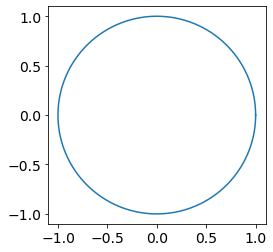

In [8]:
# ANSWER ME
def DrawCircle():
  listX = []
  listY = []
  i = 0
  while i < 2*np.pi:
    listX.append(np.cos(i))
    listY.append(np.sin(i))
    i += 0.0001
  plt.plot(listX,listY)
DrawCircle()
plt.axis('scaled') 
plt.show()

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>


### b. Drawing a polygon

🦉Now that you can draw a circle, the next step is to draw a polygon inside the circle.  Write a function `DrawPolygon(N)`. The points of a $N$-sided polygon should be at angles $2\pi/N$.  You should add an extra point at the end so your polygon looks closed. 

Use your function to draw a 5-sided polygon (after drawing the circle):
```
DrawCircle()
DrawPolygon(5)
plt.show()
```

*Write below your function to draw a $N$ sided polygon and then use it to draw a 5-sided polygon.  You can use* `dTheta = 2*np.pi/N` *in your function.*

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

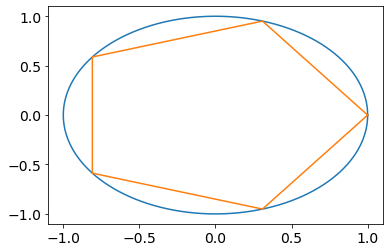

In [9]:
# ANSWER ME
def DrawPolygon(N):
  listX = []
  listY = []
  dTheta = 2*np.pi/N
  i = 0;
  while i < 2*np.pi + dTheta:
    listX.append(np.cos(i))
    listY.append(np.sin(i))
    i += dTheta
  plt.plot(listX,listY)
DrawCircle()
DrawPolygon(5)
plt.show()

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>


### c. Python Fun - List Comprehensions 

A cool Python feature is list comprehensions. Instead of writing a `for` loop, if we're clever we can stuff everything into one line inside a list, and python will be able to fill out the list faster than doing an `append()`.  
Check out the example below:

In [10]:
slowList = []
for i in range(0,5):
    slowList.append(i-5)
# now we rearrange the syntax, so what we want each element to be
# is *first* and the for loop statement is after
fastList = [i-5 for i in range(0,5)]
print("slowList=",slowList)
print("fastList=",fastList)

slowList= [-5, -4, -3, -2, -1]
fastList= [-5, -4, -3, -2, -1]


🦉Try rewriting your answer to **b.** to use list comprehensions, turning any `for` loops you had into one line. At the end of the day, you'll want a line that generates your `x` points and another that has your `y` points, for example. 

*Optional:* In addition, you could turn your perimeter code into one line, by making a list of distances and summing them all using `np.sum`. Don't worry about this for now, you'll get plenty of practice later!

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

5.877852522924732


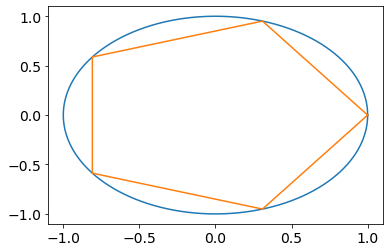

In [19]:
# answer here!
def DrawPolygon(N):
  dTheta = 2*np.pi/N
  listsides = [i*dTheta for i in range(0,N+1)]
  listX = [np.cos(i) for i in listsides]
  listY = [np.sin(i) for i in listsides]
  plt.plot(listX,listY)
  distance = []
  for i in range(0,N):
    distanceX = listX[i] - listX[i+1]
    distanceY = listY[i] - listY[i+1]
    distance.append((distanceX**2 + distanceY**2)**0.5)
  perimeter = np.sum(distance)
  print(perimeter)
DrawCircle()
DrawPolygon(5)
plt.show()

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>


🦉Modify your function above to return the perimeter of the polygon that you drew. Now make a plot of the estimate of $\pi$ ($C/2$) from a $N$-sided polygon as a function of $3<N<100$.   

How close is your answer to $\pi$ for $N=100$?


*Have your function return the perimeter of your polygon which should be an approximation of $2\pi$.  You can copy it from above or just change the above function (and call it down here).  Also include your code (and plot) that shows how far you are from $\pi$.  You might want to use `plt.axhline(np.pi,linestyle='--')` to draw a line where $\pi$ is on your plot.  Also include below how close you get for $N=100$.*

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

<function matplotlib.pyplot.show(*args, **kw)>

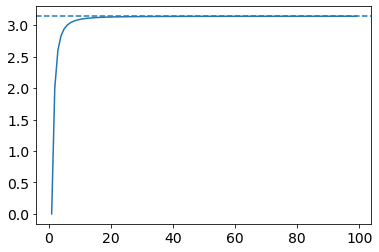

In [26]:
# ANSWER HERE
def DrawPolygon(N):
  dTheta = 2*np.pi/N
  listsides = [i*dTheta for i in range(0,N+1)]
  listX = [np.cos(i) for i in listsides]
  listY = [np.sin(i) for i in listsides]
  distance = []
  for i in range(0,N):
    distanceX = listX[i] - listX[i+1]
    distanceY = listY[i] - listY[i+1]
    distance.append((distanceX**2 + distanceY**2)**0.5)
  perimeter = np.sum(distance)
  return perimeter/2

plt.show()
pi_value = []
index = []
for i in range(1,100):
  pi_value.append(DrawPolygon(i))
  index.append(i)
plt.plot(index,pi_value)
plt.axhline(np.pi,linestyle='--')
plt.show

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

### d.  Inscribed Polygon (EC) (Extra Credit: 5 points)

Do the same thing you did earlier but use both the inscribed and circumscribed polygons.  Show that you approach $\pi$ from above and below. 

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

In [ ]:
# ANSWER HERE

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

## Exercise 3: Throwing Darts

* **List of collaborators:**

* **References you used in developing your code:**

In this exercise, we will compute $\pi$ by (*in silico*[<sup>2</sup>](#fn2)) throwing darts at a board.  To do this,  we are going to need to use random numbers.

You can read about Python’s (pseudo)random number generating functions here: https://docs.python.org/3/library/random.html. They live in the `random` library, and can be imported using `import random`. Here’s a snippet of code that generates a sequence of random numbers between -1 and 1.


In [27]:
import random
for i in range(1,10):
    print(random.uniform(-1,1))

-0.8840042696185342
0.8484187105343295
-0.9586291925906325
0.9090228979494392
0.04293000031378469
0.34396730817722365
-0.3795990317525286
-0.46396078307121735
0.7621508070976002


A couple of fine points: `uniform(-1,1)` generates random numbers with a uniform distribution in the semi-open range `[-1.0,1.0)`;  the `range` specification in the for loop requires i to be greater than or equal to 1, but less than 10. Only nine random numbers are printed.

### a. Darts at a board

🦉Draw a a $1 \times 1$ square with a circle of radius 0.5 within it. Then pick 25 random points $(x,y)$ in the square (do this by picking two random numbers each between -1 and 1). Plot them within the square (`plt.plot(x,y,'.',color='red'`).   Recall that the area of a circle is $\pi r^2$, and that if you inscribe a circle of radius 0.5 inside a square of side length 1, the ratio of the areas of the circle and square will be $\pi$/4.
$$\frac{\pi r^2}{4 r^2}= \frac{\pi}{4}$$

Because the dart is likely to hit any place on the square, the fraction of dots within the circle is the ratio of the area between the circle and the square.


I removed all the axis to make them look prettier by doing:
```python
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.show()
```


*Code below for circle and random points in a square.*

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

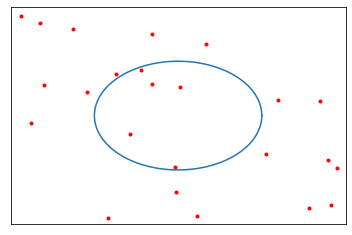

In [128]:
# ANSWER HERE
import random
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
listX = []
listY = []
i = 0
while i < 2*np.pi:
  listX.append(0.5*np.cos(i))
  listY.append(0.5*np.sin(i))
  i += 0.0001
plt.plot(listX,listY)
x = []
y = []
n = 25
for i in range(1,n):
    x.append(random.uniform(-1,1))
    y.append(random.uniform(-1,1))
plt.plot(x,y,'.',color='red')
plt.show()

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

### b. $\pi$ from Darts

🦉Within your loops, measure the fraction of dots that actually end up in your circle.  Measure $\pi$ using this number both with 25 dots as well as 2500 dots (for this latter number you might want to turn off the plotting or it will be really slow). 

*Code for fraction of points which are in the circle.  This should be $\pi/4$ so multiply by 4 to get $\pi$*

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

In [139]:
# ANSWER HERE
def value_fraction(n):
  import random
  listX = []
  listY = []
  i = 0
  while i < 2*np.pi:
    listX.append(0.5*np.cos(i))
    listY.append(0.5*np.sin(i))
    i += 0.0001
  x = []
  y = []
  for i in range(1,n):
      x.append(random.uniform(-1,1))
      y.append(random.uniform(-1,1))
  count = 0
  for i in range(0,n-1):
    if (x[i]**2 + y[i]**2) <= 0.5**2:
      count += 1
  fraction = count/n
  pi_value = fraction*4
  return pi_value
print(value_fraction(2500))

0.7328


<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

### c. Repeated Experiments

🦉Now wrap your code in an additional outer loop which runs 1000 times. You now have an outer loops (1000 times) and inner loop (2500 times).   You are now estimating $\pi$ 1000 times.  

Store each of the estimates in an array (or list) and generate a histogram (bar graph) of the values in the array using `plt.hist`. If my estimates were stored in a list named `storedVals` I can generate a histogram by
```python
plt.hist(storedVals)
#...add axis labels, etc here...
plt.show()
```

Finally increase the number of iterations in your inner loop from 2,500 to 10,000. How does the RMS width of your histogram change?  
(You should find that it is about half as big. It is very common for statistical precision to improve proportional to the square root of the number of samples in your average.)


*Run your function to get $\pi$ many times and make a histogram of your answers below.*

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsStart.svg" width=200 align=left></img><br>

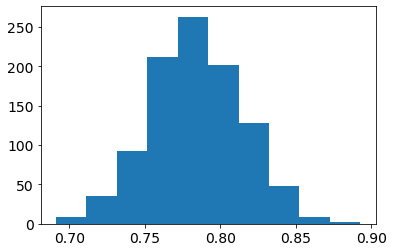

In [141]:
# ANSWER HERE
storedVals = []
for i in range(0,1000):
  storedVals.append(value_fraction(2500))
plt.hist(storedVals)
plt.show()

<img src="https://courses.physics.illinois.edu/phys246/fa2022/img/AnsEnd.svg" width=200 align=left></img><br>

## Exercise 4: Buffon's Needle (EC) (Extra Credit: 10 points)

* **List of collaborators:**

* **References you used in developing your code:**

Read about Buffon's needle and implement a simulation of it to get $\pi$.

**Acknowledgements:** 
* Ex. 1,3 originally developed by George Gollin
* Ex. 2 developed by Bryan Clark

© Copyright 2022

<span id=“fn1”><sup>1</sup>http://mathworld.wolfram.com/PiFormulas.html </span>

<span id=“fn2”><sup>2</sup>performed by computer simulation; by silicon</span>